# 1. Preparing a prediction model for profit of 50_startups data.

# Problem Statement

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


 profit will be fixed
 1. x = R&D y = profit
 2. x = Administration y = profit
 3. x = Marketing spend   y = profit
 4. x = state  y = profit

# In MLR we are having two methods for prediction

## 1. Using linear model
## 2. Using Stats model
========================================================================================================================

# 1. Using Linear Model...

In [1]:
# importing the libraries..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv("50_startups.csv")
df.shape

(50, 5)

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


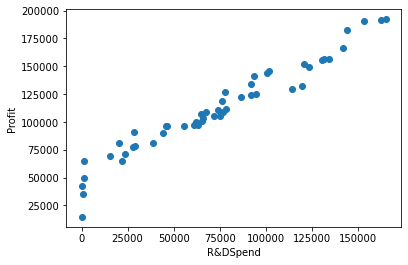

In [4]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel("R&DSpend")
plt.ylabel("Profit")
plt.show()

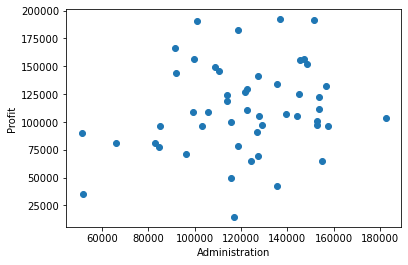

In [5]:
plt.scatter(df['Administration'],df['Profit'])
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

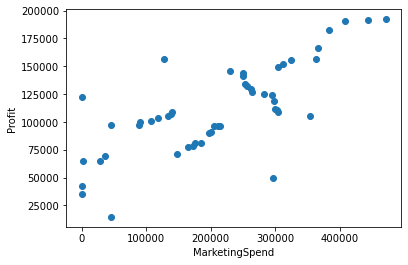

In [6]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel("MarketingSpend")
plt.ylabel("Profit")
plt.show()

In [7]:
df.corr()
# finding the correlation of all the variables
#correaltion will help use to chose which variable should be used first 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
y = df["Profit"] # fixed varaible we need to predict

In [9]:
x = df[["R&D Spend"]] # changes variable
# B0 +B1R&D Spend              where B = beta 

In [10]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 9226.1
r square: 0.95


In [11]:
x = df[["R&D Spend" , "Marketing Spend"]]
# B0 + B1R&D Spend + B2Marketing Spend

In [12]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
Y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)

RMSE = np.sqrt(mse)
print("Root mean square error : ",RMSE.round(2))

r2 = r2_score(y,y_pred)
print("r square : ",r2.round(2))

Root mean square error :  9226.1
r square :  0.95


In [13]:
x = df[["R&D Spend" , "Marketing Spend" , "Administration" ]]
# B0 + B1R&D Spend + B2Marketing Spend + B3Administration

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
Y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)

RMSE = np.sqrt(mse)
print("Root mean square error : ",RMSE.round(2))

r2 = r2_score(y,y_pred)
print("r square : ",r2.round(2))

Root mean square error :  9226.1
r square :  0.95


# 2. Using Stats Model..

In [15]:
d1 = {"R&D Spend" : "RDSpend", "Marketing Spend" : "MarketingSpend"}
# we are renaming the variables because our machine is taking spaces as invalid synatx
#for removing spaces we are using dictionary we assign new names to them

In [16]:
# changing the column name 
df.rename(columns = d1 , inplace = True)
#assigning the new names to dataframe(df)

In [17]:
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
import statsmodels.formula.api as smf

model = smf.ols('Profit ~ RDSpend + MarketingSpend + Administration', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        19:29:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.

In [19]:
print("Mean square error : ",np.mean(model.resid ** 2))

Mean square error :  78417126.01913083


<AxesSubplot:>

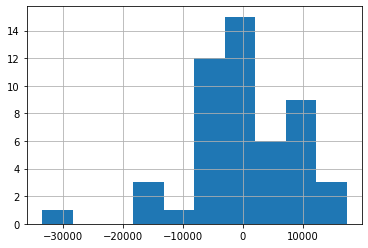

In [20]:
model.resid.hist() # histogram

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


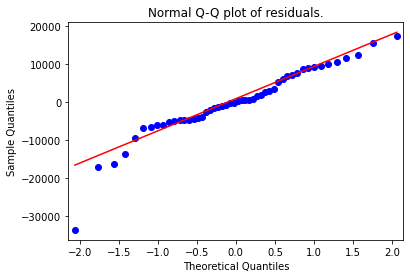

In [21]:
#Resednitail analysis
#Test for normality 

import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residuals.")
plt.show()
# please igone the warning

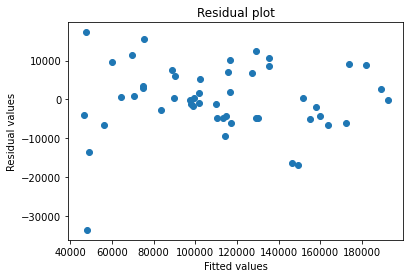

In [22]:
# Residual plot..
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual plot")
plt.xlabel("Fitted values")
plt.ylabel("Residual values")
plt.show()

In [23]:
# checking the model influence
model_influence = model.get_influence()
model_influence
(cooks,pvalue) = model_influence.cooks_distance
cooks = pd.DataFrame(cooks)
cooks[0].describe()


count    50.000000
mean      0.022891
std       0.049837
min       0.000009
25%       0.001373
50%       0.004441
75%       0.020875
max       0.288082
Name: 0, dtype: float64

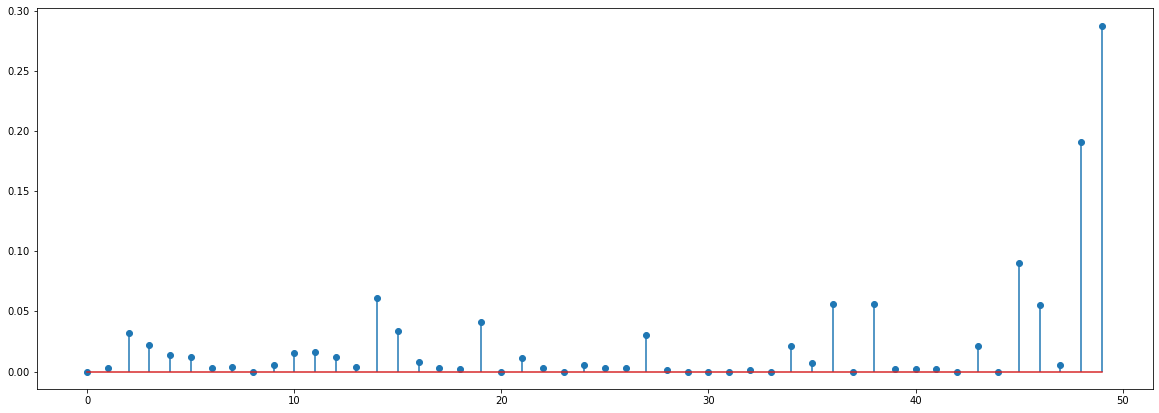

In [24]:
# PLot the influence values..

fig = plt.subplots(figsize = (20 ,7))
plt.stem(np.arange(len(df)),np.round(cooks[0],3))
plt.xlabel = ("Row Index")
plt.ylabel = ("Cooks Distance")
plt.show()


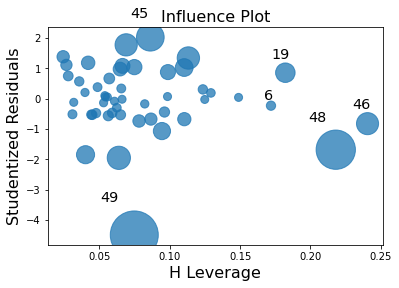

Laverage cutoff: 0.36


In [25]:
## High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
print("Laverage cutoff:",leverage_cutoff)